In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('diabetes.csv')
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [7]:
df.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [8]:
len(df)

15000

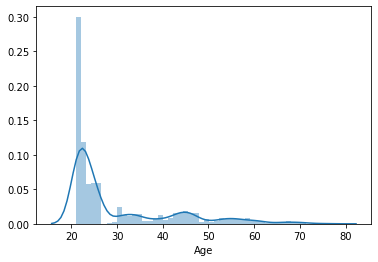

In [10]:
sns.distplot(df.Age)

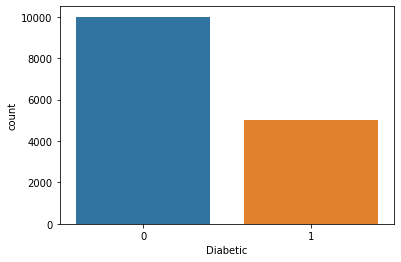

In [11]:
sns.countplot(df.Diabetic,data=df)

In [15]:
bins=[20,30,40,50,65,90]
age=['20-30','30-40','40-50','50-65','65-90']
df['age']=pd.cut(df['Age'],bins=bins,labels=age)
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,age
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,20-30
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,20-30
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,20-30
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,40-50
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,20-30


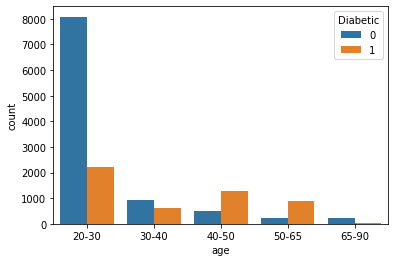

In [16]:
sns.countplot(df.age,data=df,hue=df.Diabetic)

In [17]:
x=df.drop('Diabetic',axis=1).values
y=df['Diabetic'].values

In [19]:
x=x[:,1:]

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
columntranformer=ColumnTransformer([('encoder',OneHotEncoder(categories='auto'),[8])],remainder='passthrough')
x=columntranformer.fit_transform(x)

In [26]:
x=x[:,1:]

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [28]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.000000,0.858108,0.602151,0.313953,0.011465,0.668952,0.510511,0.000000
1,0.0,0.0,0.0,0.0,0.571429,0.324324,0.741935,0.465116,0.028025,0.080352,0.036123,0.035714
2,0.0,0.0,0.0,0.0,0.500000,0.479730,0.247312,0.523256,0.026752,0.616137,0.000438,0.035714
3,0.0,1.0,0.0,0.0,0.642857,0.398649,0.580645,0.209302,0.369427,0.300831,0.541848,0.392857
4,0.0,0.0,0.0,0.0,0.071429,0.277027,0.376344,0.232558,0.026752,0.645027,0.212047,0.017857
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,1.0,0.0,0.0,0.714286,0.141892,0.387097,0.453488,0.207643,0.404713,0.031608,0.357143
14996,1.0,0.0,0.0,0.0,0.142857,0.195946,0.451613,0.232558,0.196178,0.315380,0.352683,0.303571
14997,0.0,0.0,0.0,0.0,0.000000,0.331081,0.698925,0.418605,0.054777,0.012956,0.156959,0.053571
14998,0.0,0.0,0.0,0.0,0.000000,0.594595,0.795699,0.127907,0.187261,0.042056,0.100836,0.035714


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [33]:
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

In [39]:
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim = 12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])
    return model
model=KerasClassifier(build_fn=create_model,verbose=1)

In [40]:
batch_size=[10,20,30]
epochs=[10,25,50]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(n_splits=3),verbose=10b)
grid_result=grid.fit(x,y)
print('best result : ',grid_result.best_score_,grid_result.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
10000/10000 [==============================] - 2s 230us/step - loss: 0.4587 - accuracy: 0.7528
Epoch 2/10
10000/10000 [==============================] - 2s 222us/step - loss: 0.4159 - accuracy: 0.7743
Epoch 3/10
10000/10000 [==============================] - 2s 234us/step - loss: 0.4102 - accuracy: 0.7782
Epoch 4/10
10000/10000 [==============================] - 2s 226us/step - loss: 0.4079 - accuracy: 0.7811
Epoch 5/10
10000/10000 [==============================] - 2s 203us/step - loss: 0.4068 - accuracy: 0.7823
Epoch 6/10
10000/10000 [==============================] - 2s 222us/step - loss: 0.4033 - accuracy: 0.7850
Epoch 7/10
10000/10000 [==============================] - 2s 216us/step - loss: 0.4007 - accuracy: 0.7844
Epoch 8/10
10000/10000 [==============================] - 2s 203us/step - loss: 0.3992 - accuracy: 0.7887
Epoch 9/10
10000/10000 [==============================] - 2s 213us/step - loss: 0.3981 - accuracy: 0.7899
Epoch 10/10
5000/5000 [=======================

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.1s remaining:    0.0s


Epoch 1/10
10000/10000 [==============================] - 2s 237us/step - loss: 0.4067 - accuracy: 0.8054
Epoch 2/10
10000/10000 [==============================] - 2s 215us/step - loss: 0.3197 - accuracy: 0.8518
Epoch 3/10
10000/10000 [==============================] - 2s 201us/step - loss: 0.2952 - accuracy: 0.8698
Epoch 4/10
10000/10000 [==============================] - 2s 212us/step - loss: 0.2843 - accuracy: 0.8749
Epoch 5/10
10000/10000 [==============================] - 2s 242us/step - loss: 0.2810 - accuracy: 0.8783
Epoch 6/10
10000/10000 [==============================] - 2s 224us/step - loss: 0.2660 - accuracy: 0.8872
Epoch 7/10
10000/10000 [==============================] - 2s 209us/step - loss: 0.2600 - accuracy: 0.8885
Epoch 8/10
10000/10000 [==============================] - 2s 206us/step - loss: 0.2544 - accuracy: 0.8924
Epoch 9/10
10000/10000 [==============================] - 2s 217us/step - loss: 0.2512 - accuracy: 0.8942
Epoch 10/10
5000/5000 [=======================

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   46.4s remaining:    0.0s


Epoch 1/10
10000/10000 [==============================] - 2s 234us/step - loss: 0.4166 - accuracy: 0.7977
Epoch 2/10
10000/10000 [==============================] - 2s 212us/step - loss: 0.3263 - accuracy: 0.8474
Epoch 3/10
10000/10000 [==============================] - 2s 213us/step - loss: 0.2977 - accuracy: 0.8664
Epoch 4/10
10000/10000 [==============================] - 2s 220us/step - loss: 0.2889 - accuracy: 0.8699
Epoch 5/10
10000/10000 [==============================] - 2s 231us/step - loss: 0.2879 - accuracy: 0.8728
Epoch 6/10
10000/10000 [==============================] - 2s 215us/step - loss: 0.2831 - accuracy: 0.8731
Epoch 7/10
10000/10000 [==============================] - 2s 210us/step - loss: 0.2807 - accuracy: 0.8738
Epoch 8/10
10000/10000 [==============================] - 2s 208us/step - loss: 0.2725 - accuracy: 0.8804
Epoch 9/10
10000/10000 [==============================] - 2s 206us/step - loss: 0.2676 - accuracy: 0.8814
Epoch 10/10
5000/5000 [=======================

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


Epoch 1/25
10000/10000 [==============================] - 2s 234us/step - loss: 0.3994 - accuracy: 0.8060
Epoch 2/25
10000/10000 [==============================] - 2s 211us/step - loss: 0.3179 - accuracy: 0.8523
Epoch 3/25
10000/10000 [==============================] - 2s 207us/step - loss: 0.2909 - accuracy: 0.8722
Epoch 4/25
10000/10000 [==============================] - 2s 205us/step - loss: 0.2878 - accuracy: 0.8730
Epoch 5/25
10000/10000 [==============================] - 2s 206us/step - loss: 0.2859 - accuracy: 0.8754
Epoch 6/25
10000/10000 [==============================] - 2s 203us/step - loss: 0.2844 - accuracy: 0.8769
Epoch 7/25
10000/10000 [==============================] - 2s 204us/step - loss: 0.2844 - accuracy: 0.8775
Epoch 8/25
10000/10000 [==============================] - 2s 206us/step - loss: 0.2800 - accuracy: 0.8765
Epoch 9/25
10000/10000 [==============================] - 2s 203us/step - loss: 0.2807 - accuracy: 0.8780
Epoch 10/25
10000/10000 [=====================

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.0min remaining:    0.0s


Epoch 1/25
10000/10000 [==============================] - 2s 217us/step - loss: 0.4161 - accuracy: 0.7897
Epoch 2/25
10000/10000 [==============================] - 2s 197us/step - loss: 0.3264 - accuracy: 0.8534
Epoch 3/25
10000/10000 [==============================] - 2s 197us/step - loss: 0.3242 - accuracy: 0.8548
Epoch 4/25
10000/10000 [==============================] - 2s 199us/step - loss: 0.3185 - accuracy: 0.8539
Epoch 5/25
10000/10000 [==============================] - 2s 200us/step - loss: 0.3176 - accuracy: 0.8568
Epoch 6/25
10000/10000 [==============================] - 2s 199us/step - loss: 0.3173 - accuracy: 0.8554
Epoch 7/25
10000/10000 [==============================] - 2s 200us/step - loss: 0.3130 - accuracy: 0.8598
Epoch 8/25
10000/10000 [==============================] - 2s 199us/step - loss: 0.3134 - accuracy: 0.8556
Epoch 9/25
10000/10000 [==============================] - 2s 197us/step - loss: 0.3127 - accuracy: 0.8607
Epoch 10/25
10000/10000 [=====================

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min remaining:    0.0s


Epoch 1/25
10000/10000 [==============================] - 2s 217us/step - loss: 0.4338 - accuracy: 0.7764
Epoch 2/25
10000/10000 [==============================] - 2s 199us/step - loss: 0.3347 - accuracy: 0.8495
Epoch 3/25
10000/10000 [==============================] - 2s 199us/step - loss: 0.3090 - accuracy: 0.8584
Epoch 4/25
10000/10000 [==============================] - 2s 199us/step - loss: 0.2910 - accuracy: 0.8713
Epoch 5/25
10000/10000 [==============================] - 2s 199us/step - loss: 0.2865 - accuracy: 0.8732
Epoch 6/25
10000/10000 [==============================] - 2s 200us/step - loss: 0.2804 - accuracy: 0.8744
Epoch 7/25
10000/10000 [==============================] - 2s 199us/step - loss: 0.2770 - accuracy: 0.8797
Epoch 8/25
10000/10000 [==============================] - 2s 200us/step - loss: 0.2684 - accuracy: 0.8849
Epoch 9/25
10000/10000 [==============================] - 2s 199us/step - loss: 0.2638 - accuracy: 0.8855
Epoch 10/25
10000/10000 [=====================

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.8min remaining:    0.0s


Epoch 1/50
10000/10000 [==============================] - 2s 219us/step - loss: 0.3957 - accuracy: 0.8165
Epoch 2/50
10000/10000 [==============================] - 2s 199us/step - loss: 0.3058 - accuracy: 0.8653
Epoch 3/50
10000/10000 [==============================] - 2s 195us/step - loss: 0.2887 - accuracy: 0.8744
Epoch 4/50
10000/10000 [==============================] - 2s 194us/step - loss: 0.2869 - accuracy: 0.8781
Epoch 5/50
10000/10000 [==============================] - 2s 194us/step - loss: 0.2842 - accuracy: 0.8763
Epoch 6/50
10000/10000 [==============================] - 2s 195us/step - loss: 0.2819 - accuracy: 0.8770
Epoch 7/50
10000/10000 [==============================] - 2s 195us/step - loss: 0.2789 - accuracy: 0.8762
Epoch 8/50
10000/10000 [==============================] - 2s 194us/step - loss: 0.2777 - accuracy: 0.8785
Epoch 9/50
10000/10000 [==============================] - 2s 193us/step - loss: 0.2737 - accuracy: 0.8838
Epoch 10/50
10000/10000 [=====================

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  5.4min remaining:    0.0s


Epoch 1/50
10000/10000 [==============================] - 4s 357us/step - loss: 0.3872 - accuracy: 0.8129
Epoch 2/50
10000/10000 [==============================] - 3s 307us/step - loss: 0.2997 - accuracy: 0.8610
Epoch 3/50
10000/10000 [==============================] - 3s 289us/step - loss: 0.2863 - accuracy: 0.8742
Epoch 4/50
10000/10000 [==============================] - 2s 248us/step - loss: 0.2811 - accuracy: 0.8772
Epoch 5/50
10000/10000 [==============================] - 2s 240us/step - loss: 0.2784 - accuracy: 0.8789
Epoch 6/50
10000/10000 [==============================] - 2s 229us/step - loss: 0.2725 - accuracy: 0.8819
Epoch 7/50
10000/10000 [==============================] - 2s 200us/step - loss: 0.2704 - accuracy: 0.8805
Epoch 8/50
10000/10000 [==============================] - 2s 199us/step - loss: 0.2667 - accuracy: 0.8825
Epoch 9/50
10000/10000 [==============================] - 3s 273us/step - loss: 0.2617 - accuracy: 0.8860
Epoch 10/50
10000/10000 [=====================

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  7.6min remaining:    0.0s


Epoch 1/50
10000/10000 [==============================] - 3s 274us/step - loss: 0.4059 - accuracy: 0.8042
Epoch 2/50
10000/10000 [==============================] - 2s 231us/step - loss: 0.3225 - accuracy: 0.8486
Epoch 3/50
10000/10000 [==============================] - 2s 222us/step - loss: 0.3026 - accuracy: 0.8606
Epoch 4/50
10000/10000 [==============================] - 2s 219us/step - loss: 0.2879 - accuracy: 0.8715
Epoch 5/50
10000/10000 [==============================] - 2s 228us/step - loss: 0.2861 - accuracy: 0.8734
Epoch 6/50
10000/10000 [==============================] - 2s 249us/step - loss: 0.2806 - accuracy: 0.8770
Epoch 7/50
10000/10000 [==============================] - 2s 227us/step - loss: 0.2776 - accuracy: 0.8780
Epoch 8/50
10000/10000 [==============================] - 2s 220us/step - loss: 0.2765 - accuracy: 0.8789
Epoch 9/50
10000/10000 [==============================] - 2s 220us/step - loss: 0.2729 - accuracy: 0.8792
Epoch 10/50
10000/10000 [=====================

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  9.5min remaining:    0.0s


Epoch 1/10
10000/10000 [==============================] - 1s 133us/step - loss: 0.4139 - accuracy: 0.7990
Epoch 2/10
10000/10000 [==============================] - 1s 110us/step - loss: 0.3059 - accuracy: 0.8664
Epoch 3/10
10000/10000 [==============================] - 1s 110us/step - loss: 0.2918 - accuracy: 0.8741
Epoch 4/10
10000/10000 [==============================] - 1s 111us/step - loss: 0.2867 - accuracy: 0.8777
Epoch 5/10
10000/10000 [==============================] - 1s 126us/step - loss: 0.2813 - accuracy: 0.8794
Epoch 6/10
10000/10000 [==============================] - 1s 126us/step - loss: 0.2785 - accuracy: 0.8796
Epoch 7/10
10000/10000 [==============================] - 1s 110us/step - loss: 0.2747 - accuracy: 0.8814
Epoch 8/10
10000/10000 [==============================] - 1s 110us/step - loss: 0.2728 - accuracy: 0.8819
Epoch 9/10
10000/10000 [==============================] - 1s 111us/step - loss: 0.2642 - accuracy: 0.8914
Epoch 10/10
5000/5000 [=======================

10000/10000 [==============================] - 1s 114us/step - loss: 0.2541 - accuracy: 0.8942
Epoch 16/25
10000/10000 [==============================] - 1s 127us/step - loss: 0.2504 - accuracy: 0.8945
Epoch 17/25
10000/10000 [==============================] - 1s 114us/step - loss: 0.2521 - accuracy: 0.8928
Epoch 18/25
10000/10000 [==============================] - 1s 112us/step - loss: 0.2504 - accuracy: 0.8949
Epoch 19/25
10000/10000 [==============================] - 1s 113us/step - loss: 0.2477 - accuracy: 0.8963
Epoch 20/25
10000/10000 [==============================] - 1s 111us/step - loss: 0.2463 - accuracy: 0.8978
Epoch 21/25
10000/10000 [==============================] - 1s 134us/step - loss: 0.2468 - accuracy: 0.8973
Epoch 22/25
10000/10000 [==============================] - 1s 129us/step - loss: 0.2461 - accuracy: 0.8996
Epoch 23/25
10000/10000 [==============================] - 1s 119us/step - loss: 0.2435 - accuracy: 0.8975
Epoch 24/25
10000/10000 [========================

10000/10000 [==============================] - 1s 110us/step - loss: 0.2396 - accuracy: 0.9013
Epoch 38/50
10000/10000 [==============================] - 1s 125us/step - loss: 0.2373 - accuracy: 0.9018
Epoch 39/50
10000/10000 [==============================] - 1s 119us/step - loss: 0.2388 - accuracy: 0.9020
Epoch 40/50
10000/10000 [==============================] - 1s 109us/step - loss: 0.2357 - accuracy: 0.9020
Epoch 41/50
10000/10000 [==============================] - 1s 107us/step - loss: 0.2370 - accuracy: 0.9005
Epoch 42/50
10000/10000 [==============================] - 1s 107us/step - loss: 0.2380 - accuracy: 0.8991
Epoch 43/50
10000/10000 [==============================] - 1s 106us/step - loss: 0.2361 - accuracy: 0.9032
Epoch 44/50
10000/10000 [==============================] - 1s 108us/step - loss: 0.2375 - accuracy: 0.9017
Epoch 45/50
10000/10000 [==============================] - 1s 107us/step - loss: 0.2351 - accuracy: 0.9015
Epoch 46/50
10000/10000 [========================

10000/10000 [==============================] - 1s 110us/step - loss: 0.2803 - accuracy: 0.8742
Epoch 10/50
10000/10000 [==============================] - 1s 109us/step - loss: 0.2755 - accuracy: 0.8786
Epoch 11/50
10000/10000 [==============================] - 1s 114us/step - loss: 0.2673 - accuracy: 0.8835
Epoch 12/50
10000/10000 [==============================] - 1s 107us/step - loss: 0.2629 - accuracy: 0.8859
Epoch 13/50
10000/10000 [==============================] - 1s 109us/step - loss: 0.2585 - accuracy: 0.8915
Epoch 14/50
10000/10000 [==============================] - 1s 109us/step - loss: 0.2557 - accuracy: 0.8925
Epoch 15/50
10000/10000 [==============================] - 1s 122us/step - loss: 0.2490 - accuracy: 0.8974
Epoch 16/50
10000/10000 [==============================] - 1s 116us/step - loss: 0.2433 - accuracy: 0.9008
Epoch 17/50
10000/10000 [==============================] - 1s 116us/step - loss: 0.2423 - accuracy: 0.8997
Epoch 18/50
10000/10000 [========================

5000/5000 [==============================] - 0s 40us/step
[CV] ............ batch_size=30, epochs=10, score=0.892, total=   9.4s
[CV] batch_size=30, epochs=25 ........................................
Epoch 1/25
10000/10000 [==============================] - 1s 100us/step - loss: 0.4279 - accuracy: 0.7818
Epoch 2/25
10000/10000 [==============================] - 1s 76us/step - loss: 0.3176 - accuracy: 0.8527
Epoch 3/25
10000/10000 [==============================] - 1s 78us/step - loss: 0.2913 - accuracy: 0.8693
Epoch 4/25
10000/10000 [==============================] - 1s 81us/step - loss: 0.2818 - accuracy: 0.8757
Epoch 5/25
10000/10000 [==============================] - 1s 86us/step - loss: 0.2807 - accuracy: 0.8768
Epoch 6/25
10000/10000 [==============================] - 1s 80us/step - loss: 0.2773 - accuracy: 0.8778
Epoch 7/25
10000/10000 [==============================] - 1s 75us/step - loss: 0.2760 - accuracy: 0.8801
Epoch 8/25
10000/10000 [==============================] - 1s 76u

10000/10000 [==============================] - 1s 83us/step - loss: 0.2346 - accuracy: 0.9004
Epoch 22/25
10000/10000 [==============================] - 1s 74us/step - loss: 0.2347 - accuracy: 0.9005
Epoch 23/25
10000/10000 [==============================] - 1s 75us/step - loss: 0.2326 - accuracy: 0.9023
Epoch 24/25
10000/10000 [==============================] - 1s 77us/step - loss: 0.2317 - accuracy: 0.9047
Epoch 25/25
5000/5000 [==============================] - 0s 40us/step
[CV] ............ batch_size=30, epochs=25, score=0.897, total=  21.3s
[CV] batch_size=30, epochs=50 ........................................
Epoch 1/50
10000/10000 [==============================] - 1s 96us/step - loss: 0.4406 - accuracy: 0.7906
Epoch 2/50
10000/10000 [==============================] - 1s 72us/step - loss: 0.3460 - accuracy: 0.8341
Epoch 3/50
10000/10000 [==============================] - 1s 72us/step - loss: 0.3091 - accuracy: 0.8587
Epoch 4/50
10000/10000 [==============================] - 1s 

10000/10000 [==============================] - 1s 73us/step - loss: 0.2393 - accuracy: 0.9009
Epoch 20/50
10000/10000 [==============================] - 1s 73us/step - loss: 0.2380 - accuracy: 0.9014
Epoch 21/50
10000/10000 [==============================] - 1s 73us/step - loss: 0.2374 - accuracy: 0.9009
Epoch 22/50
10000/10000 [==============================] - 1s 75us/step - loss: 0.2361 - accuracy: 0.9020
Epoch 23/50
10000/10000 [==============================] - 1s 74us/step - loss: 0.2349 - accuracy: 0.9027
Epoch 24/50
10000/10000 [==============================] - 1s 74us/step - loss: 0.2346 - accuracy: 0.9037
Epoch 25/50
10000/10000 [==============================] - 1s 74us/step - loss: 0.2350 - accuracy: 0.9032
Epoch 26/50
10000/10000 [==============================] - 1s 73us/step - loss: 0.2347 - accuracy: 0.9041
Epoch 27/50
10000/10000 [==============================] - 1s 72us/step - loss: 0.2336 - accuracy: 0.9058
Epoch 28/50
10000/10000 [==============================] -

10000/10000 [==============================] - 1s 84us/step - loss: 0.2229 - accuracy: 0.9053
Epoch 44/50
10000/10000 [==============================] - 1s 81us/step - loss: 0.2235 - accuracy: 0.9081
Epoch 45/50
10000/10000 [==============================] - 1s 75us/step - loss: 0.2227 - accuracy: 0.9081
Epoch 46/50
10000/10000 [==============================] - 1s 74us/step - loss: 0.2229 - accuracy: 0.9066
Epoch 47/50
10000/10000 [==============================] - 1s 75us/step - loss: 0.2240 - accuracy: 0.9063
Epoch 48/50
10000/10000 [==============================] - 1s 80us/step - loss: 0.2245 - accuracy: 0.9057
Epoch 49/50
10000/10000 [==============================] - 1s 85us/step - loss: 0.2228 - accuracy: 0.9068
Epoch 50/50
5000/5000 [==============================] - 0s 39us/step
[CV] ............ batch_size=30, epochs=50, score=0.903, total=  40.6s


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 18.3min finished


Epoch 1/50
15000/15000 [==============================] - 2s 133us/step - loss: 0.4488 - accuracy: 0.7508
Epoch 2/50
15000/15000 [==============================] - 2s 117us/step - loss: 0.4128 - accuracy: 0.7741
Epoch 3/50
15000/15000 [==============================] - 2s 109us/step - loss: 0.4121 - accuracy: 0.7752
Epoch 4/50
15000/15000 [==============================] - 2s 110us/step - loss: 0.4091 - accuracy: 0.7768
Epoch 5/50
15000/15000 [==============================] - 2s 109us/step - loss: 0.4080 - accuracy: 0.7777
Epoch 6/50
15000/15000 [==============================] - 2s 109us/step - loss: 0.4076 - accuracy: 0.7781
Epoch 7/50
15000/15000 [==============================] - 2s 119us/step - loss: 0.4067 - accuracy: 0.7777
Epoch 8/50
15000/15000 [==============================] - 2s 114us/step - loss: 0.4071 - accuracy: 0.7783
Epoch 9/50
15000/15000 [==============================] - 2s 109us/step - loss: 0.4063 - accuracy: 0.7787
Epoch 10/50
15000/15000 [=====================

In [43]:
def create_model(learn_rate,drop_rate):
    model = Sequential()
    model.add(Dense(20, input_dim = 12, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=Adam(lr=learn_rate),metrics=['accuracy'])
    return model
model=KerasClassifier(build_fn=create_model,verbose=1,epochs=50,batch_size=20)
learn_rate=[0.001,0.01,0.001]
drop_rate=[0.5,0.2,0.1,0.0]
param_grid=dict(learn_rate=learn_rate,drop_rate=drop_rate)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(n_splits=3),verbose=10)
grid_result=grid.fit(x_train,y_train,validation_data=(x_test,y_test))
print('best model :',grid_result.best_score_,grid_result.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] drop_rate=0.5, learn_rate=0.001 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 192us/step - loss: 0.6246 - accuracy: 0.6872 - val_loss: 0.5325 - val_accuracy: 0.7851
Epoch 2/50
7500/7500 [==============================] - 1s 145us/step - loss: 0.5545 - accuracy: 0.7167 - val_loss: 0.4879 - val_accuracy: 0.8083
Epoch 3/50
7500/7500 [==============================] - 1s 145us/step - loss: 0.5264 - accuracy: 0.7219 - val_loss: 0.4566 - val_accuracy: 0.8192
Epoch 4/50
7500/7500 [==============================] - 1s 145us/step - loss: 0.5144 - accuracy: 0.7173 - val_loss: 0.4339 - val_accuracy: 0.8224
Epoch 5/50
7500/7500 [==============================] - 1s 145us/step - loss: 0.5026 - accuracy: 0.7253 - val_loss: 0.4169 - val_accuracy: 0.8280
Epoch 6/50
7500/7500 [==============================] - 1s 144us/step - loss: 0.4891 - accuracy: 0.7343 - val_loss: 0.4015 - val_accuracy: 0.8312
Epoch 7/50
7500/7500 [==============================] - 1s 146us/step - loss

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.3s remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 198us/step - loss: 0.6216 - accuracy: 0.6881 - val_loss: 0.5181 - val_accuracy: 0.7808
Epoch 2/50
7500/7500 [==============================] - 1s 151us/step - loss: 0.5424 - accuracy: 0.7171 - val_loss: 0.4739 - val_accuracy: 0.8043
Epoch 3/50
7500/7500 [==============================] - 1s 149us/step - loss: 0.5220 - accuracy: 0.7164 - val_loss: 0.4524 - val_accuracy: 0.8120
Epoch 4/50
7500/7500 [==============================] - 1s 155us/step - loss: 0.5089 - accuracy: 0.7117 - val_loss: 0.4371 - val_accuracy: 0.8173
Epoch 5/50
7500/7500 [==============================] - 1s 163us/step - loss: 0.4911 - accuracy: 0.7227 - val_loss: 0.4180 - val_accuracy: 0.8205
Epoch 6/50
7500/7500 [==============================] - 1s 155us/step - loss: 0.4812 - accuracy: 0.7236 - val_loss: 0.4043 - val_accuracy: 0.8256
Epoch 7/50
7500/7500 [==============================] - 1s 160us/step - loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 192us/step - loss: 0.6361 - accuracy: 0.6869 - val_loss: 0.5437 - val_accuracy: 0.7811
Epoch 2/50
7500/7500 [==============================] - 1s 142us/step - loss: 0.5571 - accuracy: 0.7187 - val_loss: 0.4854 - val_accuracy: 0.8005
Epoch 3/50
7500/7500 [==============================] - 1s 144us/step - loss: 0.5372 - accuracy: 0.7199 - val_loss: 0.4676 - val_accuracy: 0.8131
Epoch 4/50
7500/7500 [==============================] - 1s 144us/step - loss: 0.5178 - accuracy: 0.7285 - val_loss: 0.4477 - val_accuracy: 0.8171
Epoch 5/50
7500/7500 [==============================] - 1s 144us/step - loss: 0.5070 - accuracy: 0.7296 - val_loss: 0.4303 - val_accuracy: 0.8200
Epoch 6/50
7500/7500 [==============================] - 1s 149us/step - loss: 0.4963 - accuracy: 0.7287 - val_loss: 0.4209 - val_accuracy: 0.8179
Epoch 7/50
7500/7500 [==============================] - 1s 143us/step - loss

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.9min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 199us/step - loss: 0.5751 - accuracy: 0.7052 - val_loss: 0.4714 - val_accuracy: 0.7683
Epoch 2/50
7500/7500 [==============================] - 1s 163us/step - loss: 0.5389 - accuracy: 0.7189 - val_loss: 0.4219 - val_accuracy: 0.7963
Epoch 3/50
7500/7500 [==============================] - 1s 157us/step - loss: 0.5158 - accuracy: 0.7372 - val_loss: 0.3782 - val_accuracy: 0.8357
Epoch 4/50
7500/7500 [==============================] - 1s 157us/step - loss: 0.4802 - accuracy: 0.7671 - val_loss: 0.3562 - val_accuracy: 0.8307
Epoch 5/50
7500/7500 [==============================] - 1s 159us/step - loss: 0.4720 - accuracy: 0.7672 - val_loss: 0.3399 - val_accuracy: 0.8472
Epoch 6/50
7500/7500 [==============================] - 1s 160us/step - loss: 0.4691 - accuracy: 0.7675 - val_loss: 0.3382 - val_accuracy: 0.8499
Epoch 7/50
7500/7500 [==============================] - 1s 156us/step - loss

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.9min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 2s 201us/step - loss: 0.5628 - accuracy: 0.6664 - val_loss: 0.4362 - val_accuracy: 0.7893
Epoch 2/50
7500/7500 [==============================] - 1s 149us/step - loss: 0.4848 - accuracy: 0.7099 - val_loss: 0.3897 - val_accuracy: 0.8155
Epoch 3/50
7500/7500 [==============================] - 1s 161us/step - loss: 0.4651 - accuracy: 0.7193 - val_loss: 0.3888 - val_accuracy: 0.8349
Epoch 4/50
7500/7500 [==============================] - 1s 167us/step - loss: 0.4604 - accuracy: 0.7276 - val_loss: 0.4119 - val_accuracy: 0.8213
Epoch 5/50
7500/7500 [==============================] - 1s 153us/step - loss: 0.4630 - accuracy: 0.7295 - val_loss: 0.3954 - val_accuracy: 0.8341
Epoch 6/50
7500/7500 [==============================] - 1s 152us/step - loss: 0.4572 - accuracy: 0.7207 - val_loss: 0.3723 - val_accuracy: 0.7909
Epoch 7/50
7500/7500 [==============================] - 1s 149us/step - loss

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.9min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 200us/step - loss: 0.5869 - accuracy: 0.7263 - val_loss: 0.4839 - val_accuracy: 0.8056
Epoch 2/50
7500/7500 [==============================] - 1s 150us/step - loss: 0.5399 - accuracy: 0.7480 - val_loss: 0.4806 - val_accuracy: 0.7752
Epoch 3/50
7500/7500 [==============================] - 1s 148us/step - loss: 0.5360 - accuracy: 0.7479 - val_loss: 0.4287 - val_accuracy: 0.8160
Epoch 4/50
7500/7500 [==============================] - 1s 147us/step - loss: 0.5244 - accuracy: 0.7555 - val_loss: 0.4143 - val_accuracy: 0.8211
Epoch 5/50
7500/7500 [==============================] - 1s 154us/step - loss: 0.5156 - accuracy: 0.7605 - val_loss: 0.4201 - val_accuracy: 0.8184
Epoch 6/50
7500/7500 [==============================] - 1s 156us/step - loss: 0.5169 - accuracy: 0.7567 - val_loss: 0.4428 - val_accuracy: 0.7973
Epoch 7/50
7500/7500 [==============================] - 1s 153us/step - loss

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.9min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 195us/step - loss: 0.6343 - accuracy: 0.6967 - val_loss: 0.5429 - val_accuracy: 0.7805
Epoch 2/50
7500/7500 [==============================] - 1s 147us/step - loss: 0.5568 - accuracy: 0.7512 - val_loss: 0.4873 - val_accuracy: 0.8040
Epoch 3/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.5306 - accuracy: 0.7639 - val_loss: 0.4691 - val_accuracy: 0.8067
Epoch 4/50
7500/7500 [==============================] - 1s 145us/step - loss: 0.5170 - accuracy: 0.7608 - val_loss: 0.4412 - val_accuracy: 0.8173
Epoch 5/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.5069 - accuracy: 0.7636 - val_loss: 0.4267 - val_accuracy: 0.8229
Epoch 6/50
7500/7500 [==============================] - 1s 147us/step - loss: 0.4837 - accuracy: 0.7801 - val_loss: 0.3995 - val_accuracy: 0.8299
Epoch 7/50
7500/7500 [==============================] - 1s 146us/step - loss

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  6.8min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 193us/step - loss: 0.6207 - accuracy: 0.6612 - val_loss: 0.5408 - val_accuracy: 0.6717
Epoch 2/50
7500/7500 [==============================] - 1s 148us/step - loss: 0.5422 - accuracy: 0.6612 - val_loss: 0.4890 - val_accuracy: 0.6717
Epoch 3/50
7500/7500 [==============================] - 1s 147us/step - loss: 0.5197 - accuracy: 0.7051 - val_loss: 0.4622 - val_accuracy: 0.8069
Epoch 4/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.5043 - accuracy: 0.7451 - val_loss: 0.4431 - val_accuracy: 0.8211
Epoch 5/50
7500/7500 [==============================] - 1s 156us/step - loss: 0.4888 - accuracy: 0.7592 - val_loss: 0.4231 - val_accuracy: 0.8272
Epoch 6/50
7500/7500 [==============================] - 1s 152us/step - loss: 0.4701 - accuracy: 0.7684 - val_loss: 0.4056 - val_accuracy: 0.8347
Epoch 7/50
7500/7500 [==============================] - 1s 151us/step - loss

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  7.8min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 2s 206us/step - loss: 0.6382 - accuracy: 0.6916 - val_loss: 0.5607 - val_accuracy: 0.7813
Epoch 2/50
7500/7500 [==============================] - 1s 159us/step - loss: 0.5677 - accuracy: 0.7409 - val_loss: 0.4961 - val_accuracy: 0.8008
Epoch 3/50
7500/7500 [==============================] - 1s 153us/step - loss: 0.5426 - accuracy: 0.7536 - val_loss: 0.4673 - val_accuracy: 0.8152
Epoch 4/50
7500/7500 [==============================] - 1s 153us/step - loss: 0.5266 - accuracy: 0.7548 - val_loss: 0.4494 - val_accuracy: 0.8141
Epoch 5/50
7500/7500 [==============================] - 1s 152us/step - loss: 0.5123 - accuracy: 0.7512 - val_loss: 0.4318 - val_accuracy: 0.8251
Epoch 6/50
7500/7500 [==============================] - 1s 154us/step - loss: 0.4983 - accuracy: 0.7708 - val_loss: 0.4162 - val_accuracy: 0.8285
Epoch 7/50
7500/7500 [==============================] - 1s 154us/step - loss

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  8.8min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 197us/step - loss: 0.6015 - accuracy: 0.7092 - val_loss: 0.4781 - val_accuracy: 0.7896
Epoch 2/50
7500/7500 [==============================] - 1s 148us/step - loss: 0.4891 - accuracy: 0.7715 - val_loss: 0.4310 - val_accuracy: 0.8083
Epoch 3/50
7500/7500 [==============================] - 1s 147us/step - loss: 0.4559 - accuracy: 0.7819 - val_loss: 0.4066 - val_accuracy: 0.8139
Epoch 4/50
7500/7500 [==============================] - 1s 147us/step - loss: 0.4296 - accuracy: 0.7968 - val_loss: 0.3803 - val_accuracy: 0.8301
Epoch 5/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.4031 - accuracy: 0.8089 - val_loss: 0.3545 - val_accuracy: 0.8392
Epoch 6/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.3826 - accuracy: 0.8181 - val_loss: 0.3341 - val_accuracy: 0.8469
Epoch 7/50
7500/7500 [==============================] - 1s 147us/step - loss

Epoch 5/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.4737 - accuracy: 0.8003 - val_loss: 0.4334 - val_accuracy: 0.8349
Epoch 6/50
7500/7500 [==============================] - 1s 144us/step - loss: 0.4493 - accuracy: 0.8053 - val_loss: 0.4064 - val_accuracy: 0.8445
Epoch 7/50
7500/7500 [==============================] - 1s 144us/step - loss: 0.4307 - accuracy: 0.8129 - val_loss: 0.3852 - val_accuracy: 0.8472
Epoch 8/50
7500/7500 [==============================] - 1s 145us/step - loss: 0.4166 - accuracy: 0.8169 - val_loss: 0.3689 - val_accuracy: 0.8523
Epoch 9/50
7500/7500 [==============================] - 1s 145us/step - loss: 0.3976 - accuracy: 0.8313 - val_loss: 0.3557 - val_accuracy: 0.8565
Epoch 10/50
7500/7500 [==============================] - 1s 145us/step - loss: 0.3900 - accuracy: 0.8311 - val_loss: 0.3432 - val_accuracy: 0.8613
Epoch 11/50
7500/7500 [==============================] - 1s 145us/step - loss: 0.3803 - accuracy: 0.8347 - val_loss: 0.3334

7500/7500 [==============================] - 1s 150us/step - loss: 0.3500 - accuracy: 0.8345 - val_loss: 0.3121 - val_accuracy: 0.8536
Epoch 10/50
7500/7500 [==============================] - 1s 148us/step - loss: 0.3503 - accuracy: 0.8396 - val_loss: 0.3061 - val_accuracy: 0.8587
Epoch 11/50
7500/7500 [==============================] - 1s 145us/step - loss: 0.3377 - accuracy: 0.8441 - val_loss: 0.3012 - val_accuracy: 0.8605
Epoch 12/50
7500/7500 [==============================] - 1s 144us/step - loss: 0.3354 - accuracy: 0.8524 - val_loss: 0.2980 - val_accuracy: 0.8637
Epoch 13/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.3326 - accuracy: 0.8501 - val_loss: 0.2981 - val_accuracy: 0.8635
Epoch 14/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.3372 - accuracy: 0.8532 - val_loss: 0.2970 - val_accuracy: 0.8645
Epoch 15/50
7500/7500 [==============================] - 1s 147us/step - loss: 0.3289 - accuracy: 0.8601 - val_loss: 0.2926 - val_

7500/7500 [==============================] - 1s 153us/step - loss: 0.6400 - accuracy: 0.6617 - val_loss: 0.6346 - val_accuracy: 0.6717
Epoch 14/50
7500/7500 [==============================] - 1s 157us/step - loss: 0.6404 - accuracy: 0.6617 - val_loss: 0.6335 - val_accuracy: 0.6717
Epoch 15/50
7500/7500 [==============================] - 1s 168us/step - loss: 0.6400 - accuracy: 0.6617 - val_loss: 0.6329 - val_accuracy: 0.6717
Epoch 16/50
7500/7500 [==============================] - 1s 177us/step - loss: 0.6401 - accuracy: 0.6617 - val_loss: 0.6330 - val_accuracy: 0.6717
Epoch 17/50
7500/7500 [==============================] - 1s 166us/step - loss: 0.6402 - accuracy: 0.6617 - val_loss: 0.6331 - val_accuracy: 0.6717
Epoch 18/50
7500/7500 [==============================] - 1s 154us/step - loss: 0.6401 - accuracy: 0.6617 - val_loss: 0.6330 - val_accuracy: 0.6717
Epoch 19/50
7500/7500 [==============================] - 1s 155us/step - loss: 0.6402 - accuracy: 0.6617 - val_loss: 0.6338 - val_

7500/7500 [==============================] - 1s 144us/step - loss: 0.4308 - accuracy: 0.7620 - val_loss: 0.4086 - val_accuracy: 0.7795
Epoch 18/50
7500/7500 [==============================] - 1s 143us/step - loss: 0.4325 - accuracy: 0.7601 - val_loss: 0.4147 - val_accuracy: 0.7704
Epoch 19/50
7500/7500 [==============================] - 1s 143us/step - loss: 0.4322 - accuracy: 0.7593 - val_loss: 0.4115 - val_accuracy: 0.7768
Epoch 20/50
7500/7500 [==============================] - 1s 142us/step - loss: 0.4350 - accuracy: 0.7575 - val_loss: 0.4059 - val_accuracy: 0.7787
Epoch 21/50
7500/7500 [==============================] - 1s 142us/step - loss: 0.4274 - accuracy: 0.7619 - val_loss: 0.4157 - val_accuracy: 0.7805
Epoch 22/50
7500/7500 [==============================] - 1s 162us/step - loss: 0.4337 - accuracy: 0.7588 - val_loss: 0.4170 - val_accuracy: 0.7795
Epoch 23/50
7500/7500 [==============================] - 1s 154us/step - loss: 0.4341 - accuracy: 0.7619 - val_loss: 0.4057 - val_

7500/7500 [==============================] - 1s 157us/step - loss: 0.3676 - accuracy: 0.8301 - val_loss: 0.2769 - val_accuracy: 0.8811
Epoch 22/50
7500/7500 [==============================] - 1s 151us/step - loss: 0.3584 - accuracy: 0.8361 - val_loss: 0.2850 - val_accuracy: 0.8835
Epoch 23/50
7500/7500 [==============================] - 1s 151us/step - loss: 0.3611 - accuracy: 0.8335 - val_loss: 0.2860 - val_accuracy: 0.8776
Epoch 24/50
7500/7500 [==============================] - 1s 177us/step - loss: 0.3573 - accuracy: 0.8337 - val_loss: 0.2768 - val_accuracy: 0.8805
Epoch 25/50
7500/7500 [==============================] - 1s 162us/step - loss: 0.3531 - accuracy: 0.8383 - val_loss: 0.2771 - val_accuracy: 0.8795
Epoch 26/50
7500/7500 [==============================] - 1s 171us/step - loss: 0.3551 - accuracy: 0.8399 - val_loss: 0.2878 - val_accuracy: 0.8733
Epoch 27/50
7500/7500 [==============================] - 1s 166us/step - loss: 0.3571 - accuracy: 0.8353 - val_loss: 0.2840 - val_

7500/7500 [==============================] - 1s 179us/step - loss: 0.3115 - accuracy: 0.8712 - val_loss: 0.2839 - val_accuracy: 0.8763
Epoch 26/50
7500/7500 [==============================] - 2s 215us/step - loss: 0.3078 - accuracy: 0.8703 - val_loss: 0.2848 - val_accuracy: 0.8765
Epoch 27/50
7500/7500 [==============================] - 2s 239us/step - loss: 0.3075 - accuracy: 0.8673 - val_loss: 0.2821 - val_accuracy: 0.8789
Epoch 28/50
7500/7500 [==============================] - 2s 224us/step - loss: 0.3102 - accuracy: 0.8721 - val_loss: 0.2795 - val_accuracy: 0.8792
Epoch 29/50
7500/7500 [==============================] - 1s 189us/step - loss: 0.3043 - accuracy: 0.8716 - val_loss: 0.2791 - val_accuracy: 0.8813
Epoch 30/50
7500/7500 [==============================] - 1s 184us/step - loss: 0.3004 - accuracy: 0.8728 - val_loss: 0.2808 - val_accuracy: 0.8781
Epoch 31/50
7500/7500 [==============================] - 2s 232us/step - loss: 0.3047 - accuracy: 0.8733 - val_loss: 0.2803 - val_

7500/7500 [==============================] - 1s 150us/step - loss: 0.3279 - accuracy: 0.8541 - val_loss: 0.2806 - val_accuracy: 0.8760
Epoch 30/50
7500/7500 [==============================] - 1s 154us/step - loss: 0.3252 - accuracy: 0.8575 - val_loss: 0.2782 - val_accuracy: 0.8755
Epoch 31/50
7500/7500 [==============================] - 1s 156us/step - loss: 0.3320 - accuracy: 0.8528 - val_loss: 0.2792 - val_accuracy: 0.8760
Epoch 32/50
7500/7500 [==============================] - 1s 153us/step - loss: 0.3292 - accuracy: 0.8523 - val_loss: 0.2820 - val_accuracy: 0.8771
Epoch 33/50
7500/7500 [==============================] - 1s 149us/step - loss: 0.3280 - accuracy: 0.8553 - val_loss: 0.2798 - val_accuracy: 0.8776
Epoch 34/50
7500/7500 [==============================] - 1s 141us/step - loss: 0.3320 - accuracy: 0.8512 - val_loss: 0.2813 - val_accuracy: 0.8741
Epoch 35/50
7500/7500 [==============================] - 1s 159us/step - loss: 0.3284 - accuracy: 0.8579 - val_loss: 0.2777 - val_

7500/7500 [==============================] - 1s 147us/step - loss: 0.3142 - accuracy: 0.8685 - val_loss: 0.2851 - val_accuracy: 0.8771
Epoch 34/50
7500/7500 [==============================] - 1s 147us/step - loss: 0.3139 - accuracy: 0.8649 - val_loss: 0.2808 - val_accuracy: 0.8771
Epoch 35/50
7500/7500 [==============================] - 1s 148us/step - loss: 0.3119 - accuracy: 0.8692 - val_loss: 0.2816 - val_accuracy: 0.8749
Epoch 36/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.3103 - accuracy: 0.8661 - val_loss: 0.2824 - val_accuracy: 0.8789
Epoch 37/50
7500/7500 [==============================] - 1s 147us/step - loss: 0.3049 - accuracy: 0.8675 - val_loss: 0.2815 - val_accuracy: 0.8741
Epoch 38/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.3110 - accuracy: 0.8688 - val_loss: 0.2817 - val_accuracy: 0.8757
Epoch 39/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.3138 - accuracy: 0.8681 - val_loss: 0.2802 - val_

7500/7500 [==============================] - 1s 154us/step - loss: 0.2808 - accuracy: 0.8821 - val_loss: 0.2656 - val_accuracy: 0.8923
Epoch 38/50
7500/7500 [==============================] - 1s 154us/step - loss: 0.2752 - accuracy: 0.8869 - val_loss: 0.2704 - val_accuracy: 0.8867
Epoch 39/50
7500/7500 [==============================] - 1s 171us/step - loss: 0.2757 - accuracy: 0.8860 - val_loss: 0.2652 - val_accuracy: 0.8912
Epoch 40/50
7500/7500 [==============================] - 1s 157us/step - loss: 0.2720 - accuracy: 0.8872 - val_loss: 0.2648 - val_accuracy: 0.8925
Epoch 41/50
7500/7500 [==============================] - 1s 173us/step - loss: 0.2779 - accuracy: 0.8828 - val_loss: 0.2644 - val_accuracy: 0.8923
Epoch 42/50
7500/7500 [==============================] - 1s 175us/step - loss: 0.2747 - accuracy: 0.8859 - val_loss: 0.2626 - val_accuracy: 0.8939
Epoch 43/50
7500/7500 [==============================] - 1s 178us/step - loss: 0.2740 - accuracy: 0.8840 - val_loss: 0.2628 - val_

7500/7500 [==============================] - 1s 143us/step - loss: 0.2932 - accuracy: 0.8751 - val_loss: 0.2660 - val_accuracy: 0.8931
Epoch 42/50
7500/7500 [==============================] - 1s 143us/step - loss: 0.2890 - accuracy: 0.8791 - val_loss: 0.2660 - val_accuracy: 0.8909
Epoch 43/50
7500/7500 [==============================] - 1s 144us/step - loss: 0.2877 - accuracy: 0.8804 - val_loss: 0.2711 - val_accuracy: 0.8883
Epoch 44/50
7500/7500 [==============================] - 1s 144us/step - loss: 0.2882 - accuracy: 0.8784 - val_loss: 0.2681 - val_accuracy: 0.8944
Epoch 45/50
7500/7500 [==============================] - 1s 142us/step - loss: 0.2917 - accuracy: 0.8765 - val_loss: 0.2667 - val_accuracy: 0.8891
Epoch 46/50
7500/7500 [==============================] - 1s 143us/step - loss: 0.2890 - accuracy: 0.8776 - val_loss: 0.2662 - val_accuracy: 0.8912
Epoch 47/50
7500/7500 [==============================] - 1s 144us/step - loss: 0.2912 - accuracy: 0.8776 - val_loss: 0.2687 - val_

7500/7500 [==============================] - 1s 175us/step - loss: 0.2734 - accuracy: 0.8872 - val_loss: 0.2613 - val_accuracy: 0.8923
Epoch 46/50
7500/7500 [==============================] - 1s 168us/step - loss: 0.2762 - accuracy: 0.8864 - val_loss: 0.2592 - val_accuracy: 0.8941
Epoch 47/50
7500/7500 [==============================] - 2s 231us/step - loss: 0.2749 - accuracy: 0.8852 - val_loss: 0.2587 - val_accuracy: 0.8939
Epoch 48/50
7500/7500 [==============================] - 1s 178us/step - loss: 0.2720 - accuracy: 0.8860 - val_loss: 0.2606 - val_accuracy: 0.8933
Epoch 49/50
7500/7500 [==============================] - 1s 167us/step - loss: 0.2690 - accuracy: 0.8885 - val_loss: 0.2595 - val_accuracy: 0.8931
Epoch 50/50
3750/3750 [==============================] - 0s 57us/step
[CV] ..... drop_rate=0.1, learn_rate=0.001, score=0.894, total= 1.1min
[CV] drop_rate=0.1, learn_rate=0.01 ..................................
Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7

7500/7500 [==============================] - 1s 186us/step - loss: 0.2634 - accuracy: 0.8924 - val_loss: 0.2591 - val_accuracy: 0.8955
Epoch 50/50
3750/3750 [==============================] - 0s 60us/step
[CV] ...... drop_rate=0.1, learn_rate=0.01, score=0.883, total= 1.1min
[CV] drop_rate=0.1, learn_rate=0.01 ..................................
Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 2s 209us/step - loss: 0.4481 - accuracy: 0.7769 - val_loss: 0.3427 - val_accuracy: 0.8432
Epoch 2/50
7500/7500 [==============================] - 1s 155us/step - loss: 0.3722 - accuracy: 0.8088 - val_loss: 0.3303 - val_accuracy: 0.8467
Epoch 3/50
7500/7500 [==============================] - 1s 149us/step - loss: 0.3540 - accuracy: 0.8256 - val_loss: 0.3280 - val_accuracy: 0.8528
Epoch 4/50
7500/7500 [==============================] - 1s 147us/step - loss: 0.3467 - accuracy: 0.8363 - val_loss: 0.3131 - val_accuracy: 0.8587
Epoch 5/50
7500/7500 

7500/7500 [==============================] - 2s 201us/step - loss: 0.4502 - accuracy: 0.7677 - val_loss: 0.3469 - val_accuracy: 0.8397
Epoch 2/50
7500/7500 [==============================] - 1s 153us/step - loss: 0.3519 - accuracy: 0.8353 - val_loss: 0.3243 - val_accuracy: 0.8491
Epoch 3/50
7500/7500 [==============================] - 1s 156us/step - loss: 0.3329 - accuracy: 0.8476 - val_loss: 0.3056 - val_accuracy: 0.8611
Epoch 4/50
7500/7500 [==============================] - 1s 149us/step - loss: 0.3251 - accuracy: 0.8499 - val_loss: 0.3051 - val_accuracy: 0.8661
Epoch 5/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.3249 - accuracy: 0.8520 - val_loss: 0.2972 - val_accuracy: 0.8712
Epoch 6/50
7500/7500 [==============================] - 1s 142us/step - loss: 0.3148 - accuracy: 0.8596 - val_loss: 0.2946 - val_accuracy: 0.8691
Epoch 7/50
7500/7500 [==============================] - 1s 142us/step - loss: 0.3144 - accuracy: 0.8621 - val_loss: 0.2973 - val_accura

7500/7500 [==============================] - 1s 161us/step - loss: 0.3972 - accuracy: 0.7991 - val_loss: 0.3663 - val_accuracy: 0.8320
Epoch 6/50
7500/7500 [==============================] - 1s 197us/step - loss: 0.3744 - accuracy: 0.8084 - val_loss: 0.3448 - val_accuracy: 0.8389
Epoch 7/50
7500/7500 [==============================] - 1s 172us/step - loss: 0.3543 - accuracy: 0.8308 - val_loss: 0.3273 - val_accuracy: 0.8480
Epoch 8/50
7500/7500 [==============================] - 1s 169us/step - loss: 0.3419 - accuracy: 0.8391 - val_loss: 0.3137 - val_accuracy: 0.8544
Epoch 9/50
7500/7500 [==============================] - 1s 167us/step - loss: 0.3272 - accuracy: 0.8492 - val_loss: 0.3029 - val_accuracy: 0.8597
Epoch 10/50
7500/7500 [==============================] - 1s 160us/step - loss: 0.3200 - accuracy: 0.8543 - val_loss: 0.2970 - val_accuracy: 0.8627
Epoch 11/50
7500/7500 [==============================] - 1s 171us/step - loss: 0.3190 - accuracy: 0.8548 - val_loss: 0.2930 - val_accu

7500/7500 [==============================] - 1s 149us/step - loss: 0.3691 - accuracy: 0.8307 - val_loss: 0.3308 - val_accuracy: 0.8485
Epoch 10/50
7500/7500 [==============================] - 1s 151us/step - loss: 0.3587 - accuracy: 0.8351 - val_loss: 0.3206 - val_accuracy: 0.8499
Epoch 11/50
7500/7500 [==============================] - 1s 150us/step - loss: 0.3463 - accuracy: 0.8387 - val_loss: 0.3109 - val_accuracy: 0.8539
Epoch 12/50
7500/7500 [==============================] - 1s 148us/step - loss: 0.3442 - accuracy: 0.8423 - val_loss: 0.3035 - val_accuracy: 0.8579
Epoch 13/50
7500/7500 [==============================] - 1s 148us/step - loss: 0.3352 - accuracy: 0.8503 - val_loss: 0.3001 - val_accuracy: 0.8581
Epoch 14/50
7500/7500 [==============================] - 1s 154us/step - loss: 0.3317 - accuracy: 0.8487 - val_loss: 0.2960 - val_accuracy: 0.8645
Epoch 15/50
7500/7500 [==============================] - 1s 156us/step - loss: 0.3233 - accuracy: 0.8565 - val_loss: 0.2905 - val_

7500/7500 [==============================] - 1s 156us/step - loss: 0.3143 - accuracy: 0.8673 - val_loss: 0.3026 - val_accuracy: 0.8685
Epoch 14/50
7500/7500 [==============================] - 1s 162us/step - loss: 0.3109 - accuracy: 0.8679 - val_loss: 0.3007 - val_accuracy: 0.8685
Epoch 15/50
7500/7500 [==============================] - 1s 171us/step - loss: 0.3062 - accuracy: 0.8697 - val_loss: 0.2937 - val_accuracy: 0.8744
Epoch 16/50
7500/7500 [==============================] - 1s 162us/step - loss: 0.3065 - accuracy: 0.8695 - val_loss: 0.2938 - val_accuracy: 0.8723
Epoch 17/50
7500/7500 [==============================] - 1s 166us/step - loss: 0.3044 - accuracy: 0.8732 - val_loss: 0.2922 - val_accuracy: 0.8720
Epoch 18/50
7500/7500 [==============================] - 1s 172us/step - loss: 0.3034 - accuracy: 0.8760 - val_loss: 0.2912 - val_accuracy: 0.8739
Epoch 19/50
7500/7500 [==============================] - 1s 159us/step - loss: 0.3038 - accuracy: 0.8741 - val_loss: 0.2889 - val_

7500/7500 [==============================] - 1s 142us/step - loss: 0.3405 - accuracy: 0.8399 - val_loss: 0.3368 - val_accuracy: 0.8419
Epoch 18/50
7500/7500 [==============================] - 1s 157us/step - loss: 0.3299 - accuracy: 0.8451 - val_loss: 0.3278 - val_accuracy: 0.8467
Epoch 19/50
7500/7500 [==============================] - 1s 138us/step - loss: 0.3189 - accuracy: 0.8492 - val_loss: 0.3184 - val_accuracy: 0.8501
Epoch 20/50
7500/7500 [==============================] - 1s 134us/step - loss: 0.3105 - accuracy: 0.8536 - val_loss: 0.3111 - val_accuracy: 0.8576
Epoch 21/50
7500/7500 [==============================] - 1s 148us/step - loss: 0.3019 - accuracy: 0.8613 - val_loss: 0.3040 - val_accuracy: 0.8597
Epoch 22/50
7500/7500 [==============================] - 1s 140us/step - loss: 0.2959 - accuracy: 0.8649 - val_loss: 0.2976 - val_accuracy: 0.8635
Epoch 23/50
7500/7500 [==============================] - 1s 140us/step - loss: 0.2900 - accuracy: 0.8684 - val_loss: 0.2936 - val_

7500/7500 [==============================] - 1s 138us/step - loss: 0.3172 - accuracy: 0.8520 - val_loss: 0.3123 - val_accuracy: 0.8568
Epoch 22/50
7500/7500 [==============================] - 1s 138us/step - loss: 0.3160 - accuracy: 0.8527 - val_loss: 0.3128 - val_accuracy: 0.8568
Epoch 23/50
7500/7500 [==============================] - 1s 142us/step - loss: 0.3150 - accuracy: 0.8517 - val_loss: 0.3115 - val_accuracy: 0.8544
Epoch 24/50
7500/7500 [==============================] - 1s 141us/step - loss: 0.3149 - accuracy: 0.8537 - val_loss: 0.3122 - val_accuracy: 0.8547
Epoch 25/50
7500/7500 [==============================] - 1s 145us/step - loss: 0.3145 - accuracy: 0.8539 - val_loss: 0.3110 - val_accuracy: 0.8568
Epoch 26/50
7500/7500 [==============================] - 1s 132us/step - loss: 0.3142 - accuracy: 0.8548 - val_loss: 0.3131 - val_accuracy: 0.8547
Epoch 27/50
7500/7500 [==============================] - 1s 151us/step - loss: 0.3135 - accuracy: 0.8547 - val_loss: 0.3157 - val_

7500/7500 [==============================] - 1s 131us/step - loss: 0.2766 - accuracy: 0.8805 - val_loss: 0.2837 - val_accuracy: 0.8752
Epoch 26/50
7500/7500 [==============================] - 1s 149us/step - loss: 0.2765 - accuracy: 0.8796 - val_loss: 0.2894 - val_accuracy: 0.8728
Epoch 27/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.2751 - accuracy: 0.8797 - val_loss: 0.2843 - val_accuracy: 0.8757
Epoch 28/50
7500/7500 [==============================] - 1s 142us/step - loss: 0.2745 - accuracy: 0.8817 - val_loss: 0.2855 - val_accuracy: 0.8736
Epoch 29/50
7500/7500 [==============================] - 1s 177us/step - loss: 0.2740 - accuracy: 0.8823 - val_loss: 0.2833 - val_accuracy: 0.8768
Epoch 30/50
7500/7500 [==============================] - 1s 150us/step - loss: 0.2732 - accuracy: 0.8819 - val_loss: 0.2826 - val_accuracy: 0.8749
Epoch 31/50
7500/7500 [==============================] - 1s 157us/step - loss: 0.2728 - accuracy: 0.8813 - val_loss: 0.2801 - val_

7500/7500 [==============================] - 1s 138us/step - loss: 0.2386 - accuracy: 0.9013 - val_loss: 0.2710 - val_accuracy: 0.8888
Epoch 30/50
7500/7500 [==============================] - 1s 135us/step - loss: 0.2386 - accuracy: 0.9016 - val_loss: 0.2657 - val_accuracy: 0.8909
Epoch 31/50
7500/7500 [==============================] - 1s 136us/step - loss: 0.2382 - accuracy: 0.9027 - val_loss: 0.2569 - val_accuracy: 0.8931
Epoch 32/50
7500/7500 [==============================] - 1s 136us/step - loss: 0.2378 - accuracy: 0.8999 - val_loss: 0.2546 - val_accuracy: 0.8957
Epoch 33/50
7500/7500 [==============================] - 1s 136us/step - loss: 0.2370 - accuracy: 0.8997 - val_loss: 0.2532 - val_accuracy: 0.8965
Epoch 34/50
7500/7500 [==============================] - 1s 137us/step - loss: 0.2330 - accuracy: 0.9027 - val_loss: 0.2571 - val_accuracy: 0.8973
Epoch 35/50
7500/7500 [==============================] - 1s 136us/step - loss: 0.2352 - accuracy: 0.9023 - val_loss: 0.2518 - val_

7500/7500 [==============================] - 1s 137us/step - loss: 0.2407 - accuracy: 0.9017 - val_loss: 0.2423 - val_accuracy: 0.9053
Epoch 34/50
7500/7500 [==============================] - 1s 136us/step - loss: 0.2388 - accuracy: 0.9009 - val_loss: 0.2429 - val_accuracy: 0.9013
Epoch 35/50
7500/7500 [==============================] - 1s 137us/step - loss: 0.2414 - accuracy: 0.8991 - val_loss: 0.2499 - val_accuracy: 0.8933
Epoch 36/50
7500/7500 [==============================] - 1s 136us/step - loss: 0.2361 - accuracy: 0.9043 - val_loss: 0.2453 - val_accuracy: 0.8976
Epoch 37/50
7500/7500 [==============================] - 1s 136us/step - loss: 0.2401 - accuracy: 0.8989 - val_loss: 0.2483 - val_accuracy: 0.9013
Epoch 38/50
7500/7500 [==============================] - 1s 136us/step - loss: 0.2342 - accuracy: 0.9028 - val_loss: 0.2470 - val_accuracy: 0.8965
Epoch 39/50
7500/7500 [==============================] - 1s 138us/step - loss: 0.2327 - accuracy: 0.9052 - val_loss: 0.2370 - val_

7500/7500 [==============================] - 2s 228us/step - loss: 0.2458 - accuracy: 0.8967 - val_loss: 0.2592 - val_accuracy: 0.8920
Epoch 38/50
7500/7500 [==============================] - 2s 226us/step - loss: 0.2465 - accuracy: 0.8964 - val_loss: 0.2470 - val_accuracy: 0.8963
Epoch 39/50
7500/7500 [==============================] - 2s 229us/step - loss: 0.2464 - accuracy: 0.8956 - val_loss: 0.2532 - val_accuracy: 0.8949
Epoch 40/50
7500/7500 [==============================] - 2s 230us/step - loss: 0.2442 - accuracy: 0.8977 - val_loss: 0.2544 - val_accuracy: 0.8901
Epoch 41/50
7500/7500 [==============================] - 2s 256us/step - loss: 0.2450 - accuracy: 0.8999 - val_loss: 0.2504 - val_accuracy: 0.8933
Epoch 42/50
7500/7500 [==============================] - 2s 210us/step - loss: 0.2428 - accuracy: 0.8988 - val_loss: 0.2532 - val_accuracy: 0.8955
Epoch 43/50
7500/7500 [==============================] - 2s 232us/step - loss: 0.2416 - accuracy: 0.8979 - val_loss: 0.2509 - val_

7500/7500 [==============================] - 1s 108us/step - loss: 0.6399 - accuracy: 0.6617 - val_loss: 0.6331 - val_accuracy: 0.6717
Epoch 42/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.6399 - accuracy: 0.6617 - val_loss: 0.6331 - val_accuracy: 0.6717
Epoch 43/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.6399 - accuracy: 0.6617 - val_loss: 0.6331 - val_accuracy: 0.6717
Epoch 44/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.6399 - accuracy: 0.6617 - val_loss: 0.6332 - val_accuracy: 0.6717
Epoch 45/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.6399 - accuracy: 0.6617 - val_loss: 0.6332 - val_accuracy: 0.6717
Epoch 46/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.6399 - accuracy: 0.6617 - val_loss: 0.6332 - val_accuracy: 0.6717
Epoch 47/50
7500/7500 [==============================] - 1s 108us/step - loss: 0.6399 - accuracy: 0.6617 - val_loss: 0.6332 - val_

7500/7500 [==============================] - 1s 109us/step - loss: 0.2715 - accuracy: 0.8843 - val_loss: 0.2781 - val_accuracy: 0.8760
Epoch 46/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2706 - accuracy: 0.8825 - val_loss: 0.2781 - val_accuracy: 0.8749
Epoch 47/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2716 - accuracy: 0.8852 - val_loss: 0.2771 - val_accuracy: 0.8795
Epoch 48/50
7500/7500 [==============================] - 1s 110us/step - loss: 0.2697 - accuracy: 0.8840 - val_loss: 0.2768 - val_accuracy: 0.8789
Epoch 49/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2708 - accuracy: 0.8829 - val_loss: 0.2774 - val_accuracy: 0.8808
Epoch 50/50
3750/3750 [==============================] - 0s 35us/step
[CV] ..... drop_rate=0.0, learn_rate=0.001, score=0.885, total=  43.0s
[CV] drop_rate=0.0, learn_rate=0.001 .................................
Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7

7500/7500 [==============================] - 1s 111us/step - loss: 0.4116 - accuracy: 0.8052 - val_loss: 0.4098 - val_accuracy: 0.8072
Epoch 50/50
3750/3750 [==============================] - 0s 35us/step
[CV] ..... drop_rate=0.0, learn_rate=0.001, score=0.805, total=  43.7s


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 35.9min finished


Train on 11250 samples, validate on 3750 samples
Epoch 1/50
11250/11250 [==============================] - 1s 122us/step - loss: 0.4020 - accuracy: 0.8012 - val_loss: 0.3142 - val_accuracy: 0.8560
Epoch 2/50
11250/11250 [==============================] - 1s 101us/step - loss: 0.2992 - accuracy: 0.8681 - val_loss: 0.2861 - val_accuracy: 0.8704
Epoch 3/50
11250/11250 [==============================] - 1s 101us/step - loss: 0.2862 - accuracy: 0.8738 - val_loss: 0.2850 - val_accuracy: 0.8733
Epoch 4/50
11250/11250 [==============================] - 1s 100us/step - loss: 0.2823 - accuracy: 0.8781 - val_loss: 0.2827 - val_accuracy: 0.8733
Epoch 5/50
11250/11250 [==============================] - 1s 100us/step - loss: 0.2788 - accuracy: 0.8772 - val_loss: 0.2742 - val_accuracy: 0.8813
Epoch 6/50
11250/11250 [==============================] - 1s 100us/step - loss: 0.2720 - accuracy: 0.8824 - val_loss: 0.2676 - val_accuracy: 0.8832
Epoch 7/50
11250/11250 [==============================] - 1s 10

In [44]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(neuron2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])
    return model
model=KerasClassifier(build_fn=create_model,verbose=1,epochs=50,batch_size=20)
neuron1=[10,15,20]
neuron2=[5,7,10]
param_grid=dict(neuron1=neuron1,neuron2=neuron2)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(n_splits=3),verbose=10)
grid_result=grid.fit(x_train,y_train,validation_data=(x_test,y_test))
print('best model :',grid_result.best_score_,grid_result.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] neuron1=10, neuron2=5 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 147us/step - loss: 0.4522 - accuracy: 0.7721 - val_loss: 0.3510 - val_accuracy: 0.8403
Epoch 2/50
7500/7500 [==============================] - 1s 108us/step - loss: 0.3364 - accuracy: 0.8459 - val_loss: 0.3435 - val_accuracy: 0.8416
Epoch 3/50
7500/7500 [==============================] - 1s 104us/step - loss: 0.3054 - accuracy: 0.8673 - val_loss: 0.3027 - val_accuracy: 0.8653
Epoch 4/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2919 - accuracy: 0.8700 - val_loss: 0.2910 - val_accuracy: 0.8709
Epoch 5/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2901 - accuracy: 0.8729 - val_loss: 0.2944 - val_accuracy: 0.8683
Epoch 6/50
7500/7500 [==============================] - 1s 106us/step - loss: 0.2836 - accuracy: 0.8760 - val_loss: 0.2917 - val_accuracy: 0.8715
Epoch 7/50
7500/7500 [==============================] - 1s 108us/step - loss

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.8s remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 134us/step - loss: 0.4476 - accuracy: 0.7785 - val_loss: 0.3686 - val_accuracy: 0.8267
Epoch 2/50
7500/7500 [==============================] - 1s 104us/step - loss: 0.3406 - accuracy: 0.8349 - val_loss: 0.3164 - val_accuracy: 0.8528
Epoch 3/50
7500/7500 [==============================] - 1s 102us/step - loss: 0.3155 - accuracy: 0.8505 - val_loss: 0.2946 - val_accuracy: 0.8632
Epoch 4/50
7500/7500 [==============================] - 1s 103us/step - loss: 0.2977 - accuracy: 0.8672 - val_loss: 0.2940 - val_accuracy: 0.8672
Epoch 5/50
7500/7500 [==============================] - 1s 103us/step - loss: 0.2911 - accuracy: 0.8725 - val_loss: 0.2909 - val_accuracy: 0.8707
Epoch 6/50
7500/7500 [==============================] - 1s 104us/step - loss: 0.2863 - accuracy: 0.8773 - val_loss: 0.2820 - val_accuracy: 0.8744
Epoch 7/50
7500/7500 [==============================] - 1s 102us/step - loss

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 133us/step - loss: 0.4710 - accuracy: 0.7407 - val_loss: 0.4189 - val_accuracy: 0.7720
Epoch 2/50
7500/7500 [==============================] - 1s 106us/step - loss: 0.4159 - accuracy: 0.7691 - val_loss: 0.4145 - val_accuracy: 0.7731
Epoch 3/50
7500/7500 [==============================] - 1s 106us/step - loss: 0.4117 - accuracy: 0.7735 - val_loss: 0.4099 - val_accuracy: 0.7781
Epoch 4/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.4089 - accuracy: 0.7749 - val_loss: 0.4111 - val_accuracy: 0.7763
Epoch 5/50
7500/7500 [==============================] - 1s 104us/step - loss: 0.4087 - accuracy: 0.7755 - val_loss: 0.4090 - val_accuracy: 0.7763
Epoch 6/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.4060 - accuracy: 0.7781 - val_loss: 0.4037 - val_accuracy: 0.7824
Epoch 7/50
7500/7500 [==============================] - 1s 117us/step - loss

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 145us/step - loss: 0.4737 - accuracy: 0.7635 - val_loss: 0.3730 - val_accuracy: 0.8355
Epoch 2/50
7500/7500 [==============================] - 1s 115us/step - loss: 0.3437 - accuracy: 0.8439 - val_loss: 0.3285 - val_accuracy: 0.8547
Epoch 3/50
7500/7500 [==============================] - 1s 119us/step - loss: 0.3248 - accuracy: 0.8539 - val_loss: 0.3278 - val_accuracy: 0.8483
Epoch 4/50
7500/7500 [==============================] - 1s 114us/step - loss: 0.3176 - accuracy: 0.8557 - val_loss: 0.3204 - val_accuracy: 0.8573
Epoch 5/50
7500/7500 [==============================] - 1s 123us/step - loss: 0.3175 - accuracy: 0.8564 - val_loss: 0.3175 - val_accuracy: 0.8613
Epoch 6/50
7500/7500 [==============================] - 1s 112us/step - loss: 0.3161 - accuracy: 0.8551 - val_loss: 0.3237 - val_accuracy: 0.8541
Epoch 7/50
7500/7500 [==============================] - 1s 114us/step - loss

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.0min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 152us/step - loss: 0.4520 - accuracy: 0.7815 - val_loss: 0.4075 - val_accuracy: 0.8115
Epoch 2/50
7500/7500 [==============================] - 1s 131us/step - loss: 0.4001 - accuracy: 0.8107 - val_loss: 0.3474 - val_accuracy: 0.8381
Epoch 3/50
7500/7500 [==============================] - 1s 121us/step - loss: 0.3410 - accuracy: 0.8369 - val_loss: 0.3168 - val_accuracy: 0.8507
Epoch 4/50
7500/7500 [==============================] - 1s 115us/step - loss: 0.3276 - accuracy: 0.8459 - val_loss: 0.3273 - val_accuracy: 0.8453
Epoch 5/50
7500/7500 [==============================] - 1s 118us/step - loss: 0.3212 - accuracy: 0.8500 - val_loss: 0.3525 - val_accuracy: 0.8307
Epoch 6/50
7500/7500 [==============================] - 1s 117us/step - loss: 0.3173 - accuracy: 0.8529 - val_loss: 0.3077 - val_accuracy: 0.8605
Epoch 7/50
7500/7500 [==============================] - 1s 112us/step - loss

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.7min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 138us/step - loss: 0.4359 - accuracy: 0.7908 - val_loss: 0.3486 - val_accuracy: 0.8341
Epoch 2/50
7500/7500 [==============================] - 1s 113us/step - loss: 0.3349 - accuracy: 0.8428 - val_loss: 0.3190 - val_accuracy: 0.8496
Epoch 3/50
7500/7500 [==============================] - 1s 104us/step - loss: 0.3172 - accuracy: 0.8545 - val_loss: 0.3159 - val_accuracy: 0.8547
Epoch 4/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2998 - accuracy: 0.8639 - val_loss: 0.2852 - val_accuracy: 0.8699
Epoch 5/50
7500/7500 [==============================] - 1s 102us/step - loss: 0.2871 - accuracy: 0.8724 - val_loss: 0.2806 - val_accuracy: 0.8725
Epoch 6/50
7500/7500 [==============================] - 1s 101us/step - loss: 0.2817 - accuracy: 0.8727 - val_loss: 0.2806 - val_accuracy: 0.8781
Epoch 7/50
7500/7500 [==============================] - 1s 105us/step - loss

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.5min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 194us/step - loss: 0.4848 - accuracy: 0.7320 - val_loss: 0.4654 - val_accuracy: 0.7488
Epoch 2/50
7500/7500 [==============================] - 1s 117us/step - loss: 0.4200 - accuracy: 0.7772 - val_loss: 0.4106 - val_accuracy: 0.7765
Epoch 3/50
7500/7500 [==============================] - 1s 113us/step - loss: 0.4105 - accuracy: 0.7808 - val_loss: 0.4198 - val_accuracy: 0.7688
Epoch 4/50
7500/7500 [==============================] - 1s 115us/step - loss: 0.4100 - accuracy: 0.7801 - val_loss: 0.4046 - val_accuracy: 0.7813
Epoch 5/50
7500/7500 [==============================] - 1s 153us/step - loss: 0.4060 - accuracy: 0.7823 - val_loss: 0.4029 - val_accuracy: 0.7816
Epoch 6/50
7500/7500 [==============================] - 1s 125us/step - loss: 0.4073 - accuracy: 0.7847 - val_loss: 0.4070 - val_accuracy: 0.7800
Epoch 7/50
7500/7500 [==============================] - 1s 115us/step - loss

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  5.4min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 133us/step - loss: 0.4370 - accuracy: 0.7848 - val_loss: 0.3465 - val_accuracy: 0.8395
Epoch 2/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.3405 - accuracy: 0.8385 - val_loss: 0.3310 - val_accuracy: 0.8461
Epoch 3/50
7500/7500 [==============================] - 1s 121us/step - loss: 0.3240 - accuracy: 0.8493 - val_loss: 0.3071 - val_accuracy: 0.8587
Epoch 4/50
7500/7500 [==============================] - 1s 119us/step - loss: 0.3034 - accuracy: 0.8620 - val_loss: 0.2850 - val_accuracy: 0.8707
Epoch 5/50
7500/7500 [==============================] - 1s 111us/step - loss: 0.2883 - accuracy: 0.8721 - val_loss: 0.2803 - val_accuracy: 0.8733
Epoch 6/50
7500/7500 [==============================] - 1s 114us/step - loss: 0.2849 - accuracy: 0.8744 - val_loss: 0.2772 - val_accuracy: 0.8765
Epoch 7/50
7500/7500 [==============================] - 1s 120us/step - loss

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  6.1min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 153us/step - loss: 0.4415 - accuracy: 0.7879 - val_loss: 0.3483 - val_accuracy: 0.8368
Epoch 2/50
7500/7500 [==============================] - 1s 189us/step - loss: 0.3361 - accuracy: 0.8421 - val_loss: 0.3257 - val_accuracy: 0.8525
Epoch 3/50
7500/7500 [==============================] - 1s 116us/step - loss: 0.3155 - accuracy: 0.8536 - val_loss: 0.3030 - val_accuracy: 0.8592
Epoch 4/50
7500/7500 [==============================] - 1s 104us/step - loss: 0.2945 - accuracy: 0.8657 - val_loss: 0.3041 - val_accuracy: 0.8605
Epoch 5/50
7500/7500 [==============================] - 1s 105us/step - loss: 0.2830 - accuracy: 0.8757 - val_loss: 0.2785 - val_accuracy: 0.8792
Epoch 6/50
7500/7500 [==============================] - 1s 104us/step - loss: 0.2801 - accuracy: 0.8752 - val_loss: 0.2814 - val_accuracy: 0.8741
Epoch 7/50
7500/7500 [==============================] - 1s 139us/step - loss

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  6.9min remaining:    0.0s


Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 154us/step - loss: 0.4551 - accuracy: 0.7843 - val_loss: 0.4187 - val_accuracy: 0.8032
Epoch 2/50
7500/7500 [==============================] - 1s 105us/step - loss: 0.4018 - accuracy: 0.8068 - val_loss: 0.3701 - val_accuracy: 0.8253
Epoch 3/50
7500/7500 [==============================] - 1s 131us/step - loss: 0.3379 - accuracy: 0.8423 - val_loss: 0.3178 - val_accuracy: 0.8605
Epoch 4/50
7500/7500 [==============================] - 1s 135us/step - loss: 0.3193 - accuracy: 0.8564 - val_loss: 0.3234 - val_accuracy: 0.8531
Epoch 5/50
7500/7500 [==============================] - 1s 127us/step - loss: 0.3142 - accuracy: 0.8547 - val_loss: 0.3616 - val_accuracy: 0.8325
Epoch 6/50
7500/7500 [==============================] - 1s 153us/step - loss: 0.3074 - accuracy: 0.8579 - val_loss: 0.3152 - val_accuracy: 0.8557
Epoch 7/50
7500/7500 [==============================] - 1s 138us/step - loss

Epoch 5/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2920 - accuracy: 0.8685 - val_loss: 0.2853 - val_accuracy: 0.8704
Epoch 6/50
7500/7500 [==============================] - 1s 116us/step - loss: 0.2880 - accuracy: 0.8741 - val_loss: 0.2839 - val_accuracy: 0.8717
Epoch 7/50
7500/7500 [==============================] - 1s 111us/step - loss: 0.2830 - accuracy: 0.8745 - val_loss: 0.2861 - val_accuracy: 0.8736
Epoch 8/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2808 - accuracy: 0.8775 - val_loss: 0.2808 - val_accuracy: 0.8757
Epoch 9/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2804 - accuracy: 0.8764 - val_loss: 0.2767 - val_accuracy: 0.8789
Epoch 10/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2775 - accuracy: 0.8803 - val_loss: 0.2749 - val_accuracy: 0.8779
Epoch 11/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2790 - accuracy: 0.8804 - val_loss: 0.2787

7500/7500 [==============================] - 1s 109us/step - loss: 0.2723 - accuracy: 0.8800 - val_loss: 0.2888 - val_accuracy: 0.8720
Epoch 10/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2737 - accuracy: 0.8803 - val_loss: 0.2684 - val_accuracy: 0.8827
Epoch 11/50
7500/7500 [==============================] - 1s 104us/step - loss: 0.2706 - accuracy: 0.8808 - val_loss: 0.2739 - val_accuracy: 0.8797
Epoch 12/50
7500/7500 [==============================] - 1s 111us/step - loss: 0.2688 - accuracy: 0.8848 - val_loss: 0.2906 - val_accuracy: 0.8752
Epoch 13/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2713 - accuracy: 0.8816 - val_loss: 0.2709 - val_accuracy: 0.8835
Epoch 14/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2672 - accuracy: 0.8823 - val_loss: 0.2704 - val_accuracy: 0.8781
Epoch 15/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2685 - accuracy: 0.8848 - val_loss: 0.2802 - val_

7500/7500 [==============================] - 1s 117us/step - loss: 0.2682 - accuracy: 0.8827 - val_loss: 0.2752 - val_accuracy: 0.8779
Epoch 14/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2694 - accuracy: 0.8829 - val_loss: 0.2912 - val_accuracy: 0.8720
Epoch 15/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2644 - accuracy: 0.8871 - val_loss: 0.2706 - val_accuracy: 0.8843
Epoch 16/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2641 - accuracy: 0.8859 - val_loss: 0.2716 - val_accuracy: 0.8851
Epoch 17/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2613 - accuracy: 0.8892 - val_loss: 0.2767 - val_accuracy: 0.8851
Epoch 18/50
7500/7500 [==============================] - 1s 110us/step - loss: 0.2618 - accuracy: 0.8861 - val_loss: 0.2726 - val_accuracy: 0.8835
Epoch 19/50
7500/7500 [==============================] - 1s 105us/step - loss: 0.2541 - accuracy: 0.8920 - val_loss: 0.2858 - val_

7500/7500 [==============================] - 1s 138us/step - loss: 0.2364 - accuracy: 0.9016 - val_loss: 0.2361 - val_accuracy: 0.9037
Epoch 18/50
7500/7500 [==============================] - 1s 154us/step - loss: 0.2333 - accuracy: 0.9000 - val_loss: 0.2360 - val_accuracy: 0.9029
Epoch 19/50
7500/7500 [==============================] - 1s 141us/step - loss: 0.2321 - accuracy: 0.9069 - val_loss: 0.2417 - val_accuracy: 0.8976
Epoch 20/50
7500/7500 [==============================] - 1s 157us/step - loss: 0.2322 - accuracy: 0.9019 - val_loss: 0.2417 - val_accuracy: 0.9000
Epoch 21/50
7500/7500 [==============================] - 1s 125us/step - loss: 0.2292 - accuracy: 0.9036 - val_loss: 0.2291 - val_accuracy: 0.9083
Epoch 22/50
7500/7500 [==============================] - 1s 131us/step - loss: 0.2283 - accuracy: 0.9051 - val_loss: 0.2379 - val_accuracy: 0.9037
Epoch 23/50
7500/7500 [==============================] - 1s 131us/step - loss: 0.2292 - accuracy: 0.9057 - val_loss: 0.2295 - val_

7500/7500 [==============================] - 1s 116us/step - loss: 0.3054 - accuracy: 0.8643 - val_loss: 0.3003 - val_accuracy: 0.8637
Epoch 22/50
7500/7500 [==============================] - 1s 117us/step - loss: 0.3036 - accuracy: 0.8655 - val_loss: 0.3164 - val_accuracy: 0.8597
Epoch 23/50
7500/7500 [==============================] - 1s 115us/step - loss: 0.3013 - accuracy: 0.8675 - val_loss: 0.3236 - val_accuracy: 0.8531
Epoch 24/50
7500/7500 [==============================] - 1s 192us/step - loss: 0.3009 - accuracy: 0.8647 - val_loss: 0.3002 - val_accuracy: 0.8664
Epoch 25/50
7500/7500 [==============================] - 1s 125us/step - loss: 0.3044 - accuracy: 0.8643 - val_loss: 0.3029 - val_accuracy: 0.8608
Epoch 26/50
7500/7500 [==============================] - 1s 116us/step - loss: 0.3024 - accuracy: 0.8617 - val_loss: 0.3123 - val_accuracy: 0.8557
Epoch 27/50
7500/7500 [==============================] - 1s 143us/step - loss: 0.3000 - accuracy: 0.8697 - val_loss: 0.3031 - val_

7500/7500 [==============================] - 1s 120us/step - loss: 0.2558 - accuracy: 0.8891 - val_loss: 0.2655 - val_accuracy: 0.8843
Epoch 26/50
7500/7500 [==============================] - 1s 116us/step - loss: 0.2568 - accuracy: 0.8907 - val_loss: 0.2702 - val_accuracy: 0.8813
Epoch 27/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2558 - accuracy: 0.8899 - val_loss: 0.2746 - val_accuracy: 0.8787
Epoch 28/50
7500/7500 [==============================] - 1s 111us/step - loss: 0.2553 - accuracy: 0.8873 - val_loss: 0.2656 - val_accuracy: 0.8779
Epoch 29/50
7500/7500 [==============================] - 1s 111us/step - loss: 0.2563 - accuracy: 0.8871 - val_loss: 0.2809 - val_accuracy: 0.8765
Epoch 30/50
7500/7500 [==============================] - 1s 110us/step - loss: 0.2565 - accuracy: 0.8887 - val_loss: 0.2642 - val_accuracy: 0.8805
Epoch 31/50
7500/7500 [==============================] - 1s 110us/step - loss: 0.2554 - accuracy: 0.8879 - val_loss: 0.2640 - val_

7500/7500 [==============================] - 1s 155us/step - loss: 0.2373 - accuracy: 0.8996 - val_loss: 0.2401 - val_accuracy: 0.8987
Epoch 30/50
7500/7500 [==============================] - 1s 124us/step - loss: 0.2317 - accuracy: 0.9023 - val_loss: 0.2435 - val_accuracy: 0.8989
Epoch 31/50
7500/7500 [==============================] - 1s 162us/step - loss: 0.2329 - accuracy: 0.9012 - val_loss: 0.2448 - val_accuracy: 0.8979
Epoch 32/50
7500/7500 [==============================] - 1s 143us/step - loss: 0.2303 - accuracy: 0.9041 - val_loss: 0.2381 - val_accuracy: 0.9027
Epoch 33/50
7500/7500 [==============================] - 1s 124us/step - loss: 0.2291 - accuracy: 0.9043 - val_loss: 0.2387 - val_accuracy: 0.8965
Epoch 34/50
7500/7500 [==============================] - 1s 149us/step - loss: 0.2287 - accuracy: 0.9040 - val_loss: 0.2477 - val_accuracy: 0.8987
Epoch 35/50
7500/7500 [==============================] - 1s 119us/step - loss: 0.2290 - accuracy: 0.9052 - val_loss: 0.2374 - val_

7500/7500 [==============================] - 1s 153us/step - loss: 0.2536 - accuracy: 0.8853 - val_loss: 0.2611 - val_accuracy: 0.8904
Epoch 34/50
7500/7500 [==============================] - 1s 138us/step - loss: 0.2525 - accuracy: 0.8873 - val_loss: 0.2659 - val_accuracy: 0.8781
Epoch 35/50
7500/7500 [==============================] - 1s 167us/step - loss: 0.2539 - accuracy: 0.8867 - val_loss: 0.2572 - val_accuracy: 0.8877
Epoch 36/50
7500/7500 [==============================] - 1s 170us/step - loss: 0.2510 - accuracy: 0.8865 - val_loss: 0.2637 - val_accuracy: 0.8861
Epoch 37/50
7500/7500 [==============================] - 1s 159us/step - loss: 0.2503 - accuracy: 0.8883 - val_loss: 0.2764 - val_accuracy: 0.8869
Epoch 38/50
7500/7500 [==============================] - 1s 164us/step - loss: 0.2509 - accuracy: 0.8868 - val_loss: 0.2563 - val_accuracy: 0.8877
Epoch 39/50
7500/7500 [==============================] - 1s 156us/step - loss: 0.2517 - accuracy: 0.8863 - val_loss: 0.2645 - val_

7500/7500 [==============================] - 1s 165us/step - loss: 0.2312 - accuracy: 0.9084 - val_loss: 0.2384 - val_accuracy: 0.9045
Epoch 38/50
7500/7500 [==============================] - 1s 146us/step - loss: 0.2313 - accuracy: 0.9051 - val_loss: 0.2462 - val_accuracy: 0.9011
Epoch 39/50
7500/7500 [==============================] - 1s 142us/step - loss: 0.2300 - accuracy: 0.9067 - val_loss: 0.2504 - val_accuracy: 0.8992
Epoch 40/50
7500/7500 [==============================] - 1s 140us/step - loss: 0.2284 - accuracy: 0.9072 - val_loss: 0.2409 - val_accuracy: 0.9069
Epoch 41/50
7500/7500 [==============================] - 1s 136us/step - loss: 0.2266 - accuracy: 0.9079 - val_loss: 0.2367 - val_accuracy: 0.9053
Epoch 42/50
7500/7500 [==============================] - 1s 171us/step - loss: 0.2255 - accuracy: 0.9079 - val_loss: 0.2358 - val_accuracy: 0.9080
Epoch 43/50
7500/7500 [==============================] - 1s 142us/step - loss: 0.2259 - accuracy: 0.9071 - val_loss: 0.2425 - val_

7500/7500 [==============================] - 1s 109us/step - loss: 0.2380 - accuracy: 0.9003 - val_loss: 0.2539 - val_accuracy: 0.8933
Epoch 42/50
7500/7500 [==============================] - 1s 113us/step - loss: 0.2382 - accuracy: 0.8996 - val_loss: 0.2487 - val_accuracy: 0.8973
Epoch 43/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2380 - accuracy: 0.9011 - val_loss: 0.2558 - val_accuracy: 0.8949
Epoch 44/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2398 - accuracy: 0.9025 - val_loss: 0.2494 - val_accuracy: 0.8976
Epoch 45/50
7500/7500 [==============================] - 1s 104us/step - loss: 0.2358 - accuracy: 0.9001 - val_loss: 0.2563 - val_accuracy: 0.8971
Epoch 46/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2360 - accuracy: 0.9029 - val_loss: 0.2574 - val_accuracy: 0.8931
Epoch 47/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2355 - accuracy: 0.9029 - val_loss: 0.2606 - val_

7500/7500 [==============================] - 1s 115us/step - loss: 0.2104 - accuracy: 0.9133 - val_loss: 0.2216 - val_accuracy: 0.9069
Epoch 46/50
7500/7500 [==============================] - 1s 148us/step - loss: 0.2083 - accuracy: 0.9143 - val_loss: 0.2201 - val_accuracy: 0.9075
Epoch 47/50
7500/7500 [==============================] - 1s 110us/step - loss: 0.2108 - accuracy: 0.9104 - val_loss: 0.2218 - val_accuracy: 0.9101
Epoch 48/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2129 - accuracy: 0.9108 - val_loss: 0.2202 - val_accuracy: 0.9091
Epoch 49/50
7500/7500 [==============================] - 1s 124us/step - loss: 0.2085 - accuracy: 0.9124 - val_loss: 0.2196 - val_accuracy: 0.9083
Epoch 50/50
3750/3750 [==============================] - 0s 39us/step
[CV] ............... neuron1=20, neuron2=5, score=0.910, total=  44.1s
[CV] neuron1=20, neuron2=7 ...........................................
Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7

7500/7500 [==============================] - 1s 113us/step - loss: 0.2399 - accuracy: 0.8984 - val_loss: 0.2541 - val_accuracy: 0.8923
Epoch 50/50
3750/3750 [==============================] - 0s 42us/step
[CV] ............... neuron1=20, neuron2=7, score=0.886, total=  42.5s
[CV] neuron1=20, neuron2=7 ...........................................
Train on 7500 samples, validate on 3750 samples
Epoch 1/50
7500/7500 [==============================] - 1s 133us/step - loss: 0.4237 - accuracy: 0.7991 - val_loss: 0.3358 - val_accuracy: 0.8467
Epoch 2/50
7500/7500 [==============================] - 1s 117us/step - loss: 0.3075 - accuracy: 0.8572 - val_loss: 0.2849 - val_accuracy: 0.8720
Epoch 3/50
7500/7500 [==============================] - 1s 135us/step - loss: 0.2922 - accuracy: 0.8732 - val_loss: 0.2846 - val_accuracy: 0.8736
Epoch 4/50
7500/7500 [==============================] - 1s 149us/step - loss: 0.2887 - accuracy: 0.8728 - val_loss: 0.3060 - val_accuracy: 0.8672
Epoch 5/50
7500/7500 

7500/7500 [==============================] - 1s 173us/step - loss: 0.4563 - accuracy: 0.7797 - val_loss: 0.3881 - val_accuracy: 0.8240
Epoch 2/50
7500/7500 [==============================] - 1s 147us/step - loss: 0.3520 - accuracy: 0.8316 - val_loss: 0.3210 - val_accuracy: 0.8504
Epoch 3/50
7500/7500 [==============================] - 1s 144us/step - loss: 0.3238 - accuracy: 0.8489 - val_loss: 0.3130 - val_accuracy: 0.8571
Epoch 4/50
7500/7500 [==============================] - 1s 143us/step - loss: 0.3186 - accuracy: 0.8525 - val_loss: 0.3103 - val_accuracy: 0.8587
Epoch 5/50
7500/7500 [==============================] - 1s 157us/step - loss: 0.3165 - accuracy: 0.8536 - val_loss: 0.3156 - val_accuracy: 0.8560
Epoch 6/50
7500/7500 [==============================] - 1s 164us/step - loss: 0.3153 - accuracy: 0.8561 - val_loss: 0.3130 - val_accuracy: 0.8552
Epoch 7/50
7500/7500 [==============================] - 1s 150us/step - loss: 0.3044 - accuracy: 0.8607 - val_loss: 0.2989 - val_accura

7500/7500 [==============================] - 1s 109us/step - loss: 0.2842 - accuracy: 0.8735 - val_loss: 0.2865 - val_accuracy: 0.8747
Epoch 6/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2798 - accuracy: 0.8805 - val_loss: 0.2964 - val_accuracy: 0.8664
Epoch 7/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2827 - accuracy: 0.8776 - val_loss: 0.2887 - val_accuracy: 0.8755
Epoch 8/50
7500/7500 [==============================] - 1s 111us/step - loss: 0.2792 - accuracy: 0.8803 - val_loss: 0.3134 - val_accuracy: 0.8611
Epoch 9/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2803 - accuracy: 0.8808 - val_loss: 0.2947 - val_accuracy: 0.8717
Epoch 10/50
7500/7500 [==============================] - 1s 112us/step - loss: 0.2789 - accuracy: 0.8787 - val_loss: 0.2828 - val_accuracy: 0.8763
Epoch 11/50
7500/7500 [==============================] - 1s 110us/step - loss: 0.2797 - accuracy: 0.8785 - val_loss: 0.2924 - val_accu

7500/7500 [==============================] - 1s 114us/step - loss: 0.2656 - accuracy: 0.8864 - val_loss: 0.2639 - val_accuracy: 0.8925
Epoch 10/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2635 - accuracy: 0.8888 - val_loss: 0.2624 - val_accuracy: 0.8875
Epoch 11/50
7500/7500 [==============================] - 1s 110us/step - loss: 0.2603 - accuracy: 0.8875 - val_loss: 0.2654 - val_accuracy: 0.8859
Epoch 12/50
7500/7500 [==============================] - 1s 108us/step - loss: 0.2604 - accuracy: 0.8863 - val_loss: 0.2668 - val_accuracy: 0.8848
Epoch 13/50
7500/7500 [==============================] - 1s 111us/step - loss: 0.2526 - accuracy: 0.8944 - val_loss: 0.2599 - val_accuracy: 0.8939
Epoch 14/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2475 - accuracy: 0.8943 - val_loss: 0.2553 - val_accuracy: 0.8949
Epoch 15/50
7500/7500 [==============================] - 1s 108us/step - loss: 0.2464 - accuracy: 0.8961 - val_loss: 0.2635 - val_

7500/7500 [==============================] - 1s 109us/step - loss: 0.2585 - accuracy: 0.8900 - val_loss: 0.2622 - val_accuracy: 0.8904
Epoch 14/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2558 - accuracy: 0.8896 - val_loss: 0.2633 - val_accuracy: 0.8869
Epoch 15/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2542 - accuracy: 0.8896 - val_loss: 0.2608 - val_accuracy: 0.8859
Epoch 16/50
7500/7500 [==============================] - 1s 107us/step - loss: 0.2527 - accuracy: 0.8896 - val_loss: 0.2544 - val_accuracy: 0.8907
Epoch 17/50
7500/7500 [==============================] - 1s 109us/step - loss: 0.2539 - accuracy: 0.8920 - val_loss: 0.2535 - val_accuracy: 0.8928
Epoch 18/50
7500/7500 [==============================] - 1s 108us/step - loss: 0.2508 - accuracy: 0.8940 - val_loss: 0.2547 - val_accuracy: 0.8907
Epoch 19/50
7500/7500 [==============================] - 1s 108us/step - loss: 0.2473 - accuracy: 0.8907 - val_loss: 0.2555 - val_

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 21.5min finished


Train on 11250 samples, validate on 3750 samples
Epoch 1/50
11250/11250 [==============================] - 1s 116us/step - loss: 0.3848 - accuracy: 0.8119 - val_loss: 0.3052 - val_accuracy: 0.8589
Epoch 2/50
11250/11250 [==============================] - 1s 102us/step - loss: 0.2958 - accuracy: 0.8663 - val_loss: 0.2849 - val_accuracy: 0.8763
Epoch 3/50
11250/11250 [==============================] - 1s 99us/step - loss: 0.2859 - accuracy: 0.8756 - val_loss: 0.2849 - val_accuracy: 0.8731
Epoch 4/50
11250/11250 [==============================] - 1s 119us/step - loss: 0.2839 - accuracy: 0.8777 - val_loss: 0.2800 - val_accuracy: 0.8768
Epoch 5/50
11250/11250 [==============================] - 2s 135us/step - loss: 0.2791 - accuracy: 0.8778 - val_loss: 0.2839 - val_accuracy: 0.8736
Epoch 6/50
11250/11250 [==============================] - 2s 134us/step - loss: 0.2732 - accuracy: 0.8799 - val_loss: 0.2751 - val_accuracy: 0.8819
Epoch 7/50
11250/11250 [==============================] - 1s 102

In [46]:
pred=grid.predict(x_test)

3750/3750 [==============================] - 0s 64us/step


In [51]:
print(pred[:10])

[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [50]:
print(y_test)

[1 0 0 ... 1 1 0]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2519
           1       0.85      0.86      0.85      1231

    accuracy                           0.90      3750
   macro avg       0.89      0.89      0.89      3750
weighted avg       0.90      0.90      0.90      3750

